# 📊 4. Evaluasi & Visualisasi

Notebook ini akan:
- Evaluasi performa model (precision, recall, F1-score)
- Visualisasi distribusi sentimen
- Confusion matrix
- Word clouds untuk setiap sentimen
- Analisis per aplikasi

**Input:** `data/processed/all_apps_with_predictions.csv`  
**Output:** Metrics + visualisasi di `reports/figures/`

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Buat folder output
Path('reports/figures').mkdir(parents=True, exist_ok=True)

print("✅ Libraries loaded")

✅ Libraries loaded


## Load Data

Load hasil prediksi dari notebook sebelumnya.

In [14]:
# Load data
data_file = 'data/processed/all_apps_with_predictions.csv'

try:
    df = pd.read_csv(data_file)
    print(f"✅ Loaded data: {len(df)} reviews")
    print(f"📊 Columns: {list(df.columns)}")
    print(f"\n📋 Preview:")
    print(df.head())
except FileNotFoundError:
    print(f"❌ File not found: {data_file}")
    print("⚠️ Jalankan notebook 3_sentiment_analysis.ipynb terlebih dahulu!")
    raise

✅ Loaded data: 2767 reviews
📊 Columns: ['app', 'content', 'score', 'at', 'thumbsUpCount', 'clean_text', 'label', 'pred_label', 'pred_confidence', 'p_positif', 'p_netral', 'p_negatif']

📋 Preview:
     app                                            content  score  \
0  gojek  hati hati aplikasi ini sering error , jgn mau ...      1   
1  gojek                                    sangat membantu      5   
2  gojek  sangat membantu keperluan masyarakat untuk har...      5   
3  gojek  transfer ke bank lain memakai aplikasi ini tap...      1   
4  gojek                                  apk yang, bagusss      5   

                    at  thumbsUpCount  \
0  2025-10-15 19:02:10              0   
1  2025-10-15 19:01:39              0   
2  2025-10-15 18:43:17              0   
3  2025-10-15 18:37:34              0   
4  2025-10-15 18:30:43              0   

                                          clean_text    label pred_label  \
0  hati hati aplikasi ini sering error , jangan m...  negati

## Evaluasi Model

Bandingkan label otomatis (dari rating) vs prediksi model.

**Catatan:** Label otomatis menggunakan rule-based (rating 1-2=negatif, 3=netral, 4-5=positif).
Model memprediksi berdasarkan konten teks review.

In [15]:
# Classification report
print("📈 CLASSIFICATION REPORT")
print("=" * 70)
print("\nPerbandingan: Label (dari rating) vs Prediksi (dari model IndoBERT)")
print()

labels = ['negatif', 'netral', 'positif']
report = classification_report(
    df['label'], 
    df['pred_label'],
    labels=labels,
    target_names=labels,
    digits=4
)
print(report)

# Overall accuracy
accuracy = accuracy_score(df['label'], df['pred_label'])
print(f"\n✅ Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

📈 CLASSIFICATION REPORT

Perbandingan: Label (dari rating) vs Prediksi (dari model IndoBERT)

              precision    recall  f1-score   support

     negatif     0.7557    0.8632    0.8059       914
      netral     0.0708    0.1232    0.0899       138
     positif     0.9710    0.8397    0.9006      1715

    accuracy                         0.8117      2767
   macro avg     0.5992    0.6087    0.5988      2767
weighted avg     0.8550    0.8117    0.8289      2767


✅ Overall Accuracy: 0.8117 (81.17%)


## Confusion Matrix

Visualisasi confusion matrix untuk melihat pola kesalahan prediksi.

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(df['label'], df['pred_label'], labels=labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels,
    cbar_kws={'label': 'Count'}
)
plt.title('Confusion Matrix\nLabel (True) vs Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()

# Save
output_file = 'reports/figures/confusion_matrix.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {output_file}")
plt.show()

## Distribusi Sentimen

Visualisasi distribusi sentimen per aplikasi.

💾 Saved: reports/figures/sentiment_distribution.png


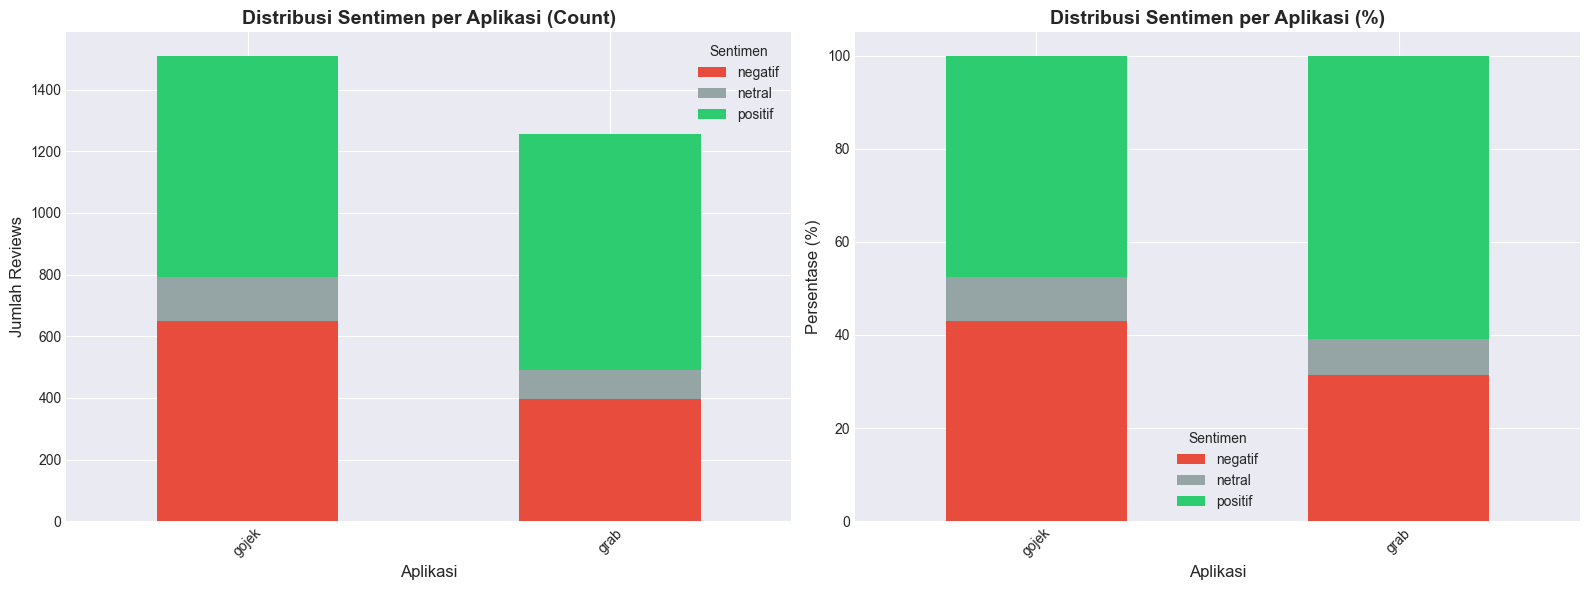


📊 DISTRIBUSI SENTIMEN PER APLIKASI
pred_label  negatif  netral  positif
app                                 
gojek           648     145      717
grab            396      95      766

📊 DISTRIBUSI SENTIMEN PER APLIKASI (%)
pred_label  negatif  netral  positif
app                                 
gojek         42.91    9.60    47.48
grab          31.50    7.56    60.94


In [16]:
# Count per app dan sentimen
dist_data = df.groupby(['app', 'pred_label']).size().unstack(fill_value=0)
dist_data = dist_data[labels]  # Reorder columns

# Plot stacked bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar (absolute count)
dist_data.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=['#e74c3c', '#95a5a6', '#2ecc71']
)
ax1.set_title('Distribusi Sentimen per Aplikasi (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Aplikasi', fontsize=12)
ax1.set_ylabel('Jumlah Reviews', fontsize=12)
ax1.legend(title='Sentimen', labels=labels)
ax1.tick_params(axis='x', rotation=45)

# Stacked bar (percentage)
dist_pct = dist_data.div(dist_data.sum(axis=1), axis=0) * 100
dist_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax2,
    color=['#e74c3c', '#95a5a6', '#2ecc71']
)
ax2.set_title('Distribusi Sentimen per Aplikasi (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Aplikasi', fontsize=12)
ax2.set_ylabel('Persentase (%)', fontsize=12)
ax2.legend(title='Sentimen', labels=labels)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save
output_file = 'reports/figures/sentiment_distribution.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {output_file}")
plt.show()

# Print statistics
print("\n📊 DISTRIBUSI SENTIMEN PER APLIKASI")
print("=" * 70)
print(dist_data)
print("\n📊 DISTRIBUSI SENTIMEN PER APLIKASI (%)")
print("=" * 70)
print(dist_pct.round(2))

## Distribusi Rating vs Sentimen

Lihat hubungan antara rating (1-5) dan sentimen yang diprediksi.

💾 Saved: reports/figures/rating_vs_sentiment.png


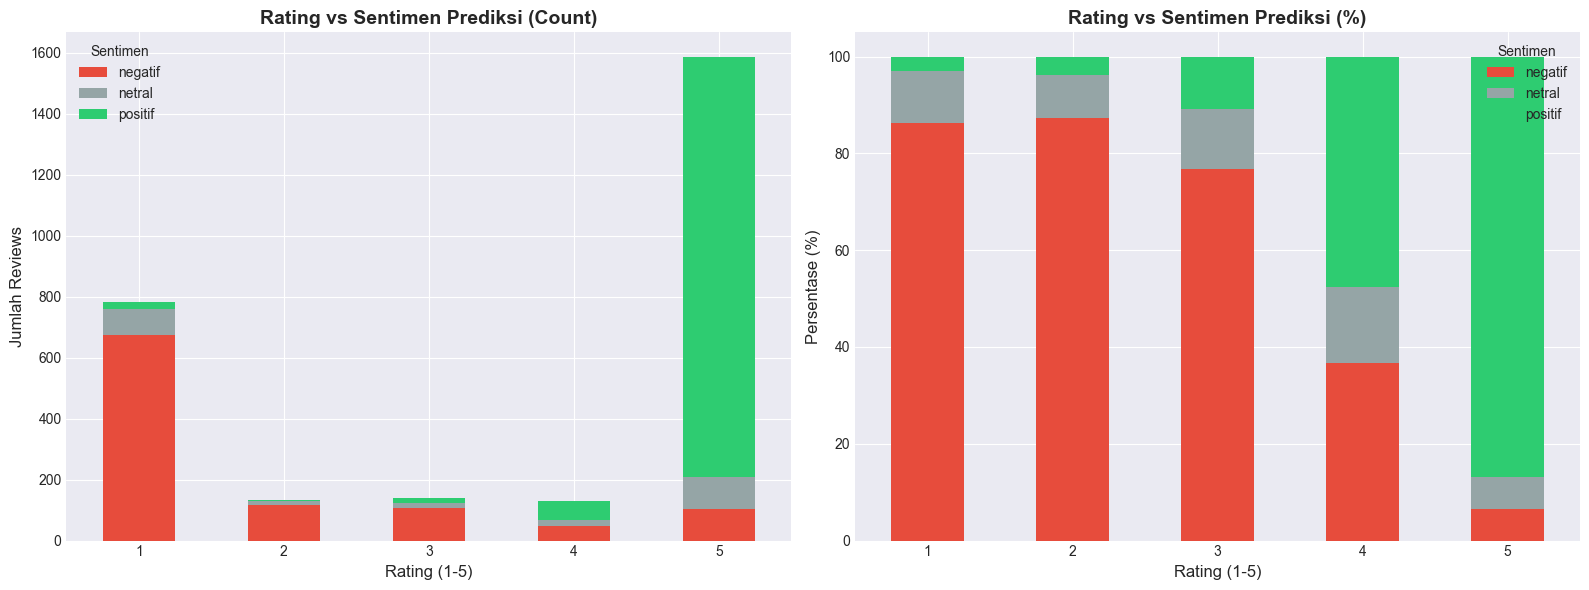


📊 RATING vs SENTIMEN
pred_label  negatif  netral  positif
score                               
1               673      85       23
2               116      12        5
3               106      17       15
4                47      20       61
5               102     106     1379

📊 RATING vs SENTIMEN (%)
pred_label  negatif  netral  positif
score                               
1             86.17   10.88     2.94
2             87.22    9.02     3.76
3             76.81   12.32    10.87
4             36.72   15.62    47.66
5              6.43    6.68    86.89


In [17]:
# Crosstab rating vs sentimen
rating_sent = pd.crosstab(df['score'], df['pred_label'])[labels]

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar (count)
rating_sent.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=['#e74c3c', '#95a5a6', '#2ecc71']
)
ax1.set_title('Rating vs Sentimen Prediksi (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rating (1-5)', fontsize=12)
ax1.set_ylabel('Jumlah Reviews', fontsize=12)
ax1.legend(title='Sentimen', labels=labels)
ax1.tick_params(axis='x', rotation=0)

# Normalized (percentage)
rating_sent_pct = rating_sent.div(rating_sent.sum(axis=1), axis=0) * 100
rating_sent_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax2,
    color=['#e74c3c', '#95a5a6', '#2ecc71']
)
ax2.set_title('Rating vs Sentimen Prediksi (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Rating (1-5)', fontsize=12)
ax2.set_ylabel('Persentase (%)', fontsize=12)
ax2.legend(title='Sentimen', labels=labels)
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()

# Save
output_file = 'reports/figures/rating_vs_sentiment.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {output_file}")
plt.show()

# Print statistics
print("\n📊 RATING vs SENTIMEN")
print("=" * 70)
print(rating_sent)
print("\n📊 RATING vs SENTIMEN (%)")
print("=" * 70)
print(rating_sent_pct.round(2))

## Word Clouds

Generate word clouds untuk setiap kategori sentimen.

🎨 GENERATING WORD CLOUDS
💾 Saved: reports/figures/wordcloud_negatif.png


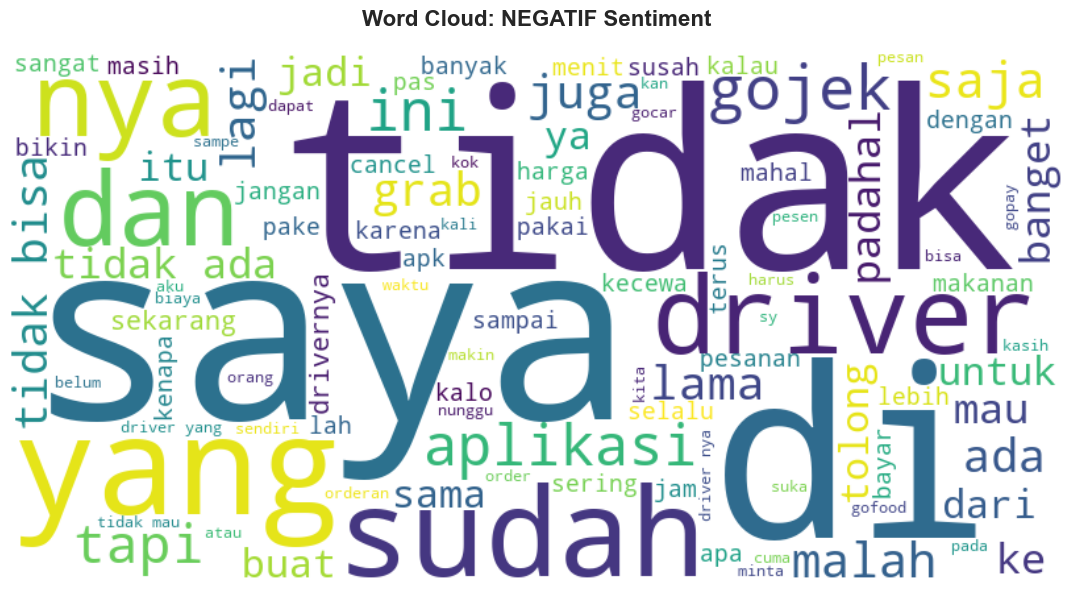

💾 Saved: reports/figures/wordcloud_netral.png


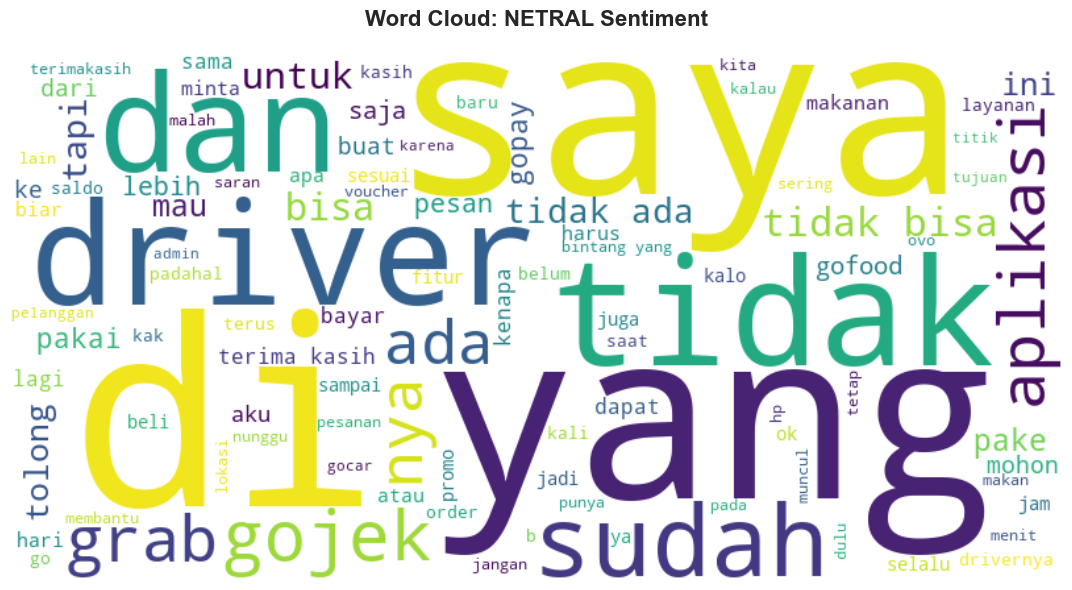

💾 Saved: reports/figures/wordcloud_positif.png


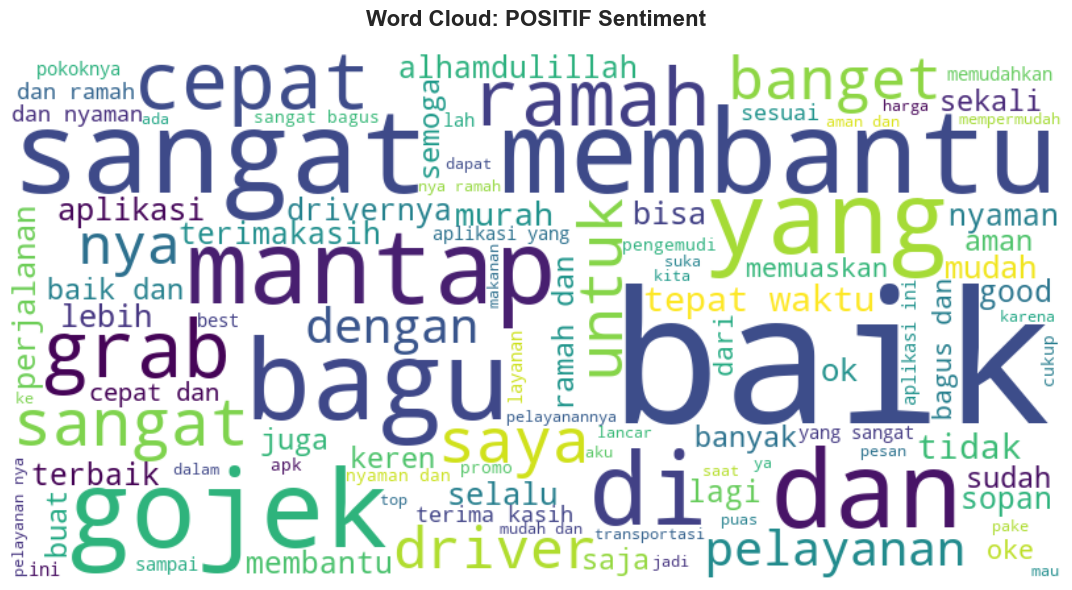

In [18]:
def generate_wordcloud(text, title, filename):
    """Generate and save word cloud."""
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=100,
        relative_scaling=0.5,
        min_font_size=10
    ).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"💾 Saved: {filename}")
    plt.show()

# Generate word cloud untuk setiap sentimen
print("🎨 GENERATING WORD CLOUDS")
print("=" * 70)

for sentiment in labels:
    # Ambil semua teks untuk sentimen ini
    texts = df[df['pred_label'] == sentiment]['clean_text'].fillna('').tolist()
    combined_text = ' '.join(texts)
    
    # Skip jika teks kosong
    if not combined_text.strip():
        print(f"⚠️ Skipping {sentiment}: no text data")
        continue
    
    # Generate word cloud
    title = f"Word Cloud: {sentiment.upper()} Sentiment"
    filename = f"reports/figures/wordcloud_{sentiment}.png"
    
    generate_wordcloud(combined_text, title, filename)

## Contoh Reviews per Sentimen

Tampilkan contoh reviews untuk setiap kategori sentimen dengan confidence tertinggi.

In [19]:
print("📝 TOP CONFIDENT PREDICTIONS PER SENTIMENT")
print("=" * 80)

for sentiment in labels:
    print(f"\n🏷️ {sentiment.upper()}")
    print("-" * 80)
    
    # Filter dan sort by confidence
    sentiment_df = df[df['pred_label'] == sentiment].copy()
    sentiment_df = sentiment_df.sort_values(f'p_{sentiment}', ascending=False)
    
    # Ambil top 3
    top_samples = sentiment_df.head(3)
    
    for idx, (_, row) in enumerate(top_samples.iterrows(), 1):
        print(f"\n#{idx}")
        print(f"App: {row['app']} | Rating: {row['score']}")
        print(f"Confidence: {row[f'p_{sentiment}']:.2%}")
        print(f"Text: {row['content'][:200]}...")
        print()

📝 TOP CONFIDENT PREDICTIONS PER SENTIMENT

🏷️ NEGATIF
--------------------------------------------------------------------------------

#1
App: grab | Rating: 1
Confidence: 99.84%
Text: Untuk pengemudinya etika nya jelek....


#2
App: grab | Rating: 1
Confidence: 99.84%
Text: login lemot ,burik tolol...


#3
App: gojek | Rating: 1
Confidence: 99.84%
Text: deraiper yah judes terus di batalin malah minta ganti rugi...


🏷️ NETRAL
--------------------------------------------------------------------------------

#1
App: gojek | Rating: 5
Confidence: 99.78%
Text: Aanm1 Axel mau ikutan kuis?...


#2
App: gojek | Rating: 5
Confidence: 99.77%
Text: mohon izinkan saya akses lengkap piltur gopay later...


#3
App: grab | Rating: 4
Confidence: 99.75%
Text: perlu dibaca MAP dan WA biar sinkronisasi 🙏...


🏷️ POSITIF
--------------------------------------------------------------------------------

#1
App: grab | Rating: 5
Confidence: 99.81%
Text: harganya terjangkau, kualitas baik banget.. recommen

## Analisis Kesalahan (Misclassification)

Lihat contoh reviews yang label dan prediksinya berbeda.

In [20]:
# Filter misclassified
misclassified = df[df['label'] != df['pred_label']].copy()

print(f"❌ MISCLASSIFIED REVIEWS")
print("=" * 80)
print(f"Total misclassified: {len(misclassified)} / {len(df)} ({len(misclassified)/len(df)*100:.2f}%)")
print()

# Analisis per kategori
print("📊 MISCLASSIFICATION BREAKDOWN")
print("-" * 80)

mismatch_counts = misclassified.groupby(['label', 'pred_label']).size().reset_index(name='count')
mismatch_counts = mismatch_counts.sort_values('count', ascending=False)

for _, row in mismatch_counts.iterrows():
    print(f"Label: {row['label']} → Predicted: {row['pred_label']} | Count: {row['count']}")

# Contoh misclassified reviews
print("\n📝 CONTOH MISCLASSIFIED REVIEWS")
print("-" * 80)

for _, row in misclassified.head(5).iterrows():
    print(f"\nApp: {row['app']} | Rating: {row['score']}")
    print(f"Label: {row['label']} → Predicted: {row['pred_label']}")
    
    # Fix: Extract pred_label first to avoid nested quotes
    pred_label = row['pred_label']
    confidence = row[f'p_{pred_label}'] * 100
    print(f"Confidence: {confidence:.1f}%")
    
    print(f"Text: {row['content'][:200]}...")
    print("-" * 80)

❌ MISCLASSIFIED REVIEWS
Total misclassified: 521 / 2767 (18.83%)

📊 MISCLASSIFICATION BREAKDOWN
--------------------------------------------------------------------------------
Label: positif → Predicted: negatif | Count: 149
Label: positif → Predicted: netral | Count: 126
Label: netral → Predicted: negatif | Count: 106
Label: negatif → Predicted: netral | Count: 97
Label: negatif → Predicted: positif | Count: 28
Label: netral → Predicted: positif | Count: 15

📝 CONTOH MISCLASSIFIED REVIEWS
--------------------------------------------------------------------------------

App: gojek | Rating: 1
Label: negatif → Predicted: netral
Confidence: 97.1%
Text: kenapa driver tidak segera mengabari apabila sudah sampai, dan kenapa harus marah²...
--------------------------------------------------------------------------------

App: gojek | Rating: 5
Label: positif → Predicted: netral
Confidence: 90.3%
Text: biarkan bintang yg berbicara...
----------------------------------------------------------

## Confidence Score Analysis

Analisis distribusi confidence score untuk setiap sentimen.

💾 Saved: reports/figures/confidence_distributions.png


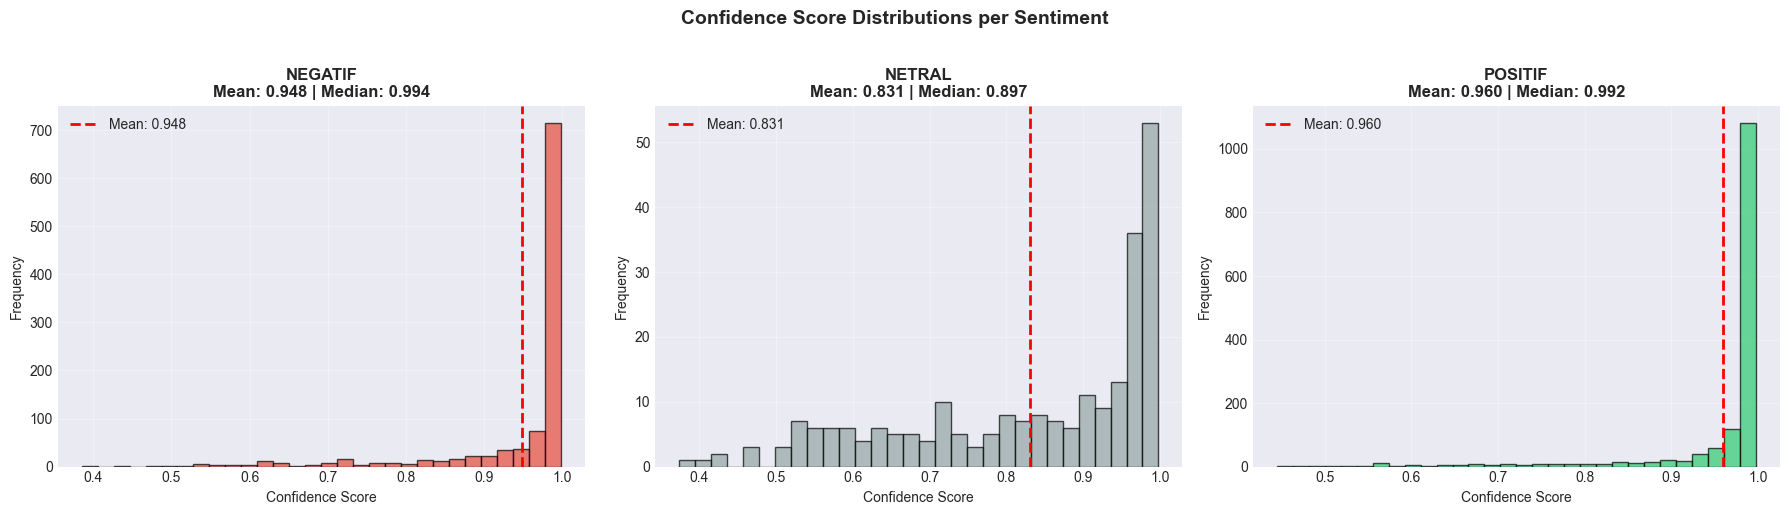


📊 CONFIDENCE SCORE STATISTICS

NEGATIF:
  Mean:   0.9485
  Median: 0.9936
  Std:    0.1013
  Min:    0.3852
  Max:    0.9984

NETRAL:
  Mean:   0.8309
  Median: 0.8973
  Std:    0.1663
  Min:    0.3740
  Max:    0.9978

POSITIF:
  Mean:   0.9604
  Median: 0.9924
  Std:    0.0858
  Min:    0.4445
  Max:    0.9981


In [21]:
# Plot confidence distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, sentiment in enumerate(labels):
    ax = axes[idx]
    
    # Filter data untuk sentimen ini
    sentiment_df = df[df['pred_label'] == sentiment]
    confidences = sentiment_df[f'p_{sentiment}']
    
    # Plot histogram
    ax.hist(confidences, bins=30, color=['#e74c3c', '#95a5a6', '#2ecc71'][idx], alpha=0.7, edgecolor='black')
    ax.set_title(f'{sentiment.upper()}\nMean: {confidences.mean():.3f} | Median: {confidences.median():.3f}', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Confidence Score', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.axvline(confidences.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {confidences.mean():.3f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Confidence Score Distributions per Sentiment', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()

# Save
output_file = 'reports/figures/confidence_distributions.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {output_file}")
plt.show()

# Statistics
print("\n📊 CONFIDENCE SCORE STATISTICS")
print("=" * 70)

for sentiment in labels:
    sentiment_df = df[df['pred_label'] == sentiment]
    confidences = sentiment_df[f'p_{sentiment}']
    
    print(f"\n{sentiment.upper()}:")
    print(f"  Mean:   {confidences.mean():.4f}")
    print(f"  Median: {confidences.median():.4f}")
    print(f"  Std:    {confidences.std():.4f}")
    print(f"  Min:    {confidences.min():.4f}")
    print(f"  Max:    {confidences.max():.4f}")

## Summary Report

Generate summary report dan simpan ke file.

In [23]:
# Generate summary report
report_lines = []
report_lines.append("=" * 80)
report_lines.append("SENTIMENT ANALYSIS REPORT")
report_lines.append("=" * 80)
report_lines.append("")

# Dataset info
report_lines.append("📊 DATASET INFO")
report_lines.append("-" * 80)
report_lines.append(f"Total reviews: {len(df)}")
report_lines.append(f"Aplikasi: {', '.join(df['app'].unique())}")
report_lines.append(f"Date range: {df['reviewCreatedVersion'].min() if 'reviewCreatedVersion' in df.columns else 'N/A'} - {df['reviewCreatedVersion'].max() if 'reviewCreatedVersion' in df.columns else 'N/A'}")
report_lines.append("")

# Model performance
report_lines.append("📈 MODEL PERFORMANCE")
report_lines.append("-" * 80)
report_lines.append(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
report_lines.append("")
report_lines.append("Classification Report:")
report_lines.append(report)

# Sentiment distribution
report_lines.append("\n📊 SENTIMENT DISTRIBUTION")
report_lines.append("-" * 80)
for sentiment in labels:
    count = len(df[df['pred_label'] == sentiment])
    pct = count / len(df) * 100
    report_lines.append(f"{sentiment}: {count} ({pct:.2f}%)")

# Per app
report_lines.append("\n📱 DISTRIBUTION PER APP")
report_lines.append("-" * 80)
for app in df['app'].unique():
    app_data = df[df['app'] == app]
    report_lines.append(f"\n{app.upper()}:")
    for sentiment in labels:
        count = len(app_data[app_data['pred_label'] == sentiment])
        pct = count / len(app_data) * 100
        report_lines.append(f"  {sentiment}: {count} ({pct:.2f}%)")

# Confidence scores
report_lines.append("\n📊 CONFIDENCE SCORES")
report_lines.append("-" * 80)
for sentiment in labels:
    sentiment_df = df[df['pred_label'] == sentiment]
    confidences = sentiment_df[f'p_{sentiment}']
    report_lines.append(f"{sentiment}: Mean={confidences.mean():.4f}, Median={confidences.median():.4f}, Std={confidences.std():.4f}")

report_lines.append("\n" + "=" * 80)
report_lines.append("END OF REPORT")
report_lines.append("=" * 80)

# Print
report_text = "\n".join(report_lines)
print(report_text)

# Save
report_file = 'reports/evaluation_report.txt'
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report_text)

print(f"\n💾 Report saved to: {report_file}")

SENTIMENT ANALYSIS REPORT

📊 DATASET INFO
--------------------------------------------------------------------------------
Total reviews: 2767
Aplikasi: gojek, grab
Date range: N/A - N/A

📈 MODEL PERFORMANCE
--------------------------------------------------------------------------------
Overall Accuracy: 0.8117 (81.17%)

Classification Report:
              precision    recall  f1-score   support

     negatif     0.7557    0.8632    0.8059       914
      netral     0.0708    0.1232    0.0899       138
     positif     0.9710    0.8397    0.9006      1715

    accuracy                         0.8117      2767
   macro avg     0.5992    0.6087    0.5988      2767
weighted avg     0.8550    0.8117    0.8289      2767


📊 SENTIMENT DISTRIBUTION
--------------------------------------------------------------------------------
negatif: 1044 (37.73%)
netral: 240 (8.67%)
positif: 1483 (53.60%)

📱 DISTRIBUTION PER APP
---------------------------------------------------------------------------

In [12]:
# Print final summary
print("\n" + "=" * 80)
print("🎉 EVALUASI SELESAI!")
print("=" * 80)
print()

print("📊 RINGKASAN:")
print(f"  • Total reviews dianalisis: {len(df):,}")
print(f"  • Model accuracy: {accuracy*100:.2f}%")
print(f"  • Aplikasi: {', '.join(df['app'].unique())}")
print()

print("📈 DISTRIBUSI PREDIKSI:")
for sentiment in labels:
    count = len(df[df['pred_label'] == sentiment])
    pct = count / len(df) * 100
    print(f"  • {sentiment.capitalize()}: {count:,} ({pct:.1f}%)")
print()

print("💾 OUTPUT FILES:")
print("  • reports/figures/confusion_matrix.png")
print("  • reports/figures/sentiment_distribution.png")
print("  • reports/figures/rating_vs_sentiment.png")
print("  • reports/figures/wordcloud_positif.png")
print("  • reports/figures/wordcloud_netral.png")
print("  • reports/figures/wordcloud_negatif.png")
print("  • reports/figures/confidence_distributions.png")
print("  • reports/evaluation_report.txt")
print()

print("✅ Semua analisis berhasil diselesaikan!")
print("=" * 80)


🎉 EVALUASI SELESAI!

📊 RINGKASAN:
  • Total reviews dianalisis: 2,767
  • Model accuracy: 81.17%
  • Aplikasi: gojek, grab

📈 DISTRIBUSI PREDIKSI:
  • Negatif: 1,044 (37.7%)
  • Netral: 240 (8.7%)
  • Positif: 1,483 (53.6%)

💾 OUTPUT FILES:
  • reports/figures/confusion_matrix.png
  • reports/figures/sentiment_distribution.png
  • reports/figures/rating_vs_sentiment.png
  • reports/figures/wordcloud_positif.png
  • reports/figures/wordcloud_netral.png
  • reports/figures/wordcloud_negatif.png
  • reports/figures/confidence_distributions.png
  • reports/evaluation_report.txt

✅ Semua analisis berhasil diselesaikan!


## 🎉 Evaluasi Selesai!

**Output yang dihasilkan:**

**Visualisasi (`reports/figures/`):**
- `confusion_matrix.png` - Confusion matrix
- `sentiment_distribution.png` - Distribusi sentimen per aplikasi
- `rating_vs_sentiment.png` - Rating vs sentimen
- `wordcloud_positif.png` - Word cloud sentimen positif
- `wordcloud_netral.png` - Word cloud sentimen netral
- `wordcloud_negatif.png` - Word cloud sentimen negatif
- `confidence_distributions.png` - Distribusi confidence scores

**Report:**
- `reports/evaluation_report.txt` - Summary report lengkap

---

## 📌 Next Steps

1. **Deployment:** Export model untuk production
2. **Monitoring:** Track model performance over time
3. **Improvement:** Fine-tune IndoBERT dengan data yang sudah dilabeli
4. **API:** Buat REST API untuk inference

**Selamat! Proyek sentiment analysis selesai!** 🚀